### Marketing Report: Detailed Analysis and Strategic Insights

- **Report Overview**: This report provides a thorough analysis of our current marketing strategies, examining product performance, pricing strategies, and customer demographics to identify areas for optimization and growth.
- **Key Objectives**: To evaluate the effectiveness of existing marketing tactics and to forecast future trends for strategic planning.

#### Data Overview:
- **Dataset Composition**: The dataset include 24 columns both categorical and numerical data types.
  - **Primary Columns**: 'Product type', 'SKU', 'Price', 'Number of products sold', 'Revenue generated', 'Customer demographics'.

- **Data Integrity**:
  - **Anomalies**: Data anomalies were normalized to ensure the integrity and reliability of our analysis.
  - **Data Cleaning**: Adjustments were made to normalize price and aggregate sales figures, encoding dataset categories for compatibility.

#### Exploratory Data Analysis (EDA):

- **Statistical Overview**: Utilized key metrics such as sales volume, revenue, and pricing to conduct a detailed statistical analysis, to identify trends and patterns.

- **Visual Insights**:

  - **Distribution and Trends**: Created visualizations including histograms, line graphs, and scatter plots to visualize sales trends and price-volume relationships.
  - **Tools Utilized**: Leveraged Tableau, matplotlib, seaborn for dynamic and interactive data exploration.

- **Insights Derived**:

  - **Sales Optimization**: Identified peak sales periods and high-revenue products.
  - **Demographic Influence**: Analyzed how customer demographics impact purchasing behaviors, aiding in targeted marketing strategies.

#### In-Depth Analysis:

- **Focused Areas**:

  - **Product Performance & Pricing**: Conducted granular analysis of how pricing affects sales volumes across different product types, optimizing pricing for maximum revenue.

- **Advanced Analytical Techniques**:

  - **Statistical and Predictive Models**: Implemented regression and time-series analyses to quantify pricing impacts and forecast sales.

#### Conclusions and Strategic Implications:

- **Summary of Findings**:

  - **Effective Strategies**: The analysis confirms the success of current pricing strategies and identifies core customer segments.
  - **Product Insights**: Pinpointed best-selling products, providing a foundation for inventory and marketing focus.

- **Implications for Future Marketing**:

  - **Strategy Refinement**: Insights from this report will guide adjustments in marketing tactics and budget allocation.
  - **Enhanced Product Offerings**: Recommendations to better align product offerings with consumer demand.



In [378]:
import pandas as pd
import matplotlib.pyplot as plt
from skimpy import skim

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_csv('../data/supply_chain_data.csv')

In [380]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 24     │ │ int32       │ 9     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 6     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean  ┃ sd    ┃ p0      ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Price                    │   0 │      0 │    49 │    31 │     1.7 │    20 │    51 │    77 │    99 │ ▇▅▃▅▆▆ │  │
│ │ Availability             │   0 │      0 │    48 │    31 │       1 │    23 │    44 │    75 │   100 │ ▇▇▅▆▅▇ │  │
│ │ Number of products sold  │   0 │      0 │   460 │   300 │       8 │   180 │   390 │   700 │  1000 │ ▇▇▅▅▃▆ │  │
│ │ Revenue generated        │   0 │      0 │  5800 │  2700 │    1100 │  2800 │  6000 │  8300 │  9900 │ ▇▅▅▅▇▇ │  │
│ │ Stock levels             │   0 │      0 │    48 │    31 │       0 │    17 │    48 │    73 │   100 │ ▇▅▅▅▃▆ │  │
│ │ Lead times               │   0 │      0 │    16 │   8.8 │       1 │     8 │    17 │    24 │    30 │ ▆▆▆▇▆▇ │  │
│ │ Order quantities         │   0 │      0 │    49 │    27 │       1 │    26 │    52 │    71 │    96 │ ▅▆▅▇▇▅ │  │
│ │ Shipping times           │   0 │      0 │   5.8 │   2.7 │       1 │   3.8 │     6 │     8 │    10 │ ▃▃▅▃▇▅ │  │
│ │ Shipping costs           │   0 │      0 │   5.5 │   2.7 │       1 │   3.5 │   5.3 │   7.6 │   9.9 │ ▇▅▇▅▆▇ │  │
│ │ Lead time                │   0 │      0 │    17 │   8.8 │       1 │    10 │    18 │    25 │    30 │ ▆▅▃▆▇▇ │  │
│ │ Production volumes       │   0 │      0 │   570 │   260 │     100 │   350 │   570 │   800 │   980 │ ▆▆▆▆▇▇ │  │
│ │ Manufacturing lead time  │   0 │      0 │    15 │   8.9 │       1 │     7 │    14 │    23 │    30 │ ▇▇▆▆▆▇ │  │
│ │ Manufacturing costs      │   0 │      0 │    47 │    29 │     1.1 │    23 │    46 │    69 │    99 │ ▇▇▇▆▅▆ │  │
│ │ Defect rates             │   0 │      0 │   2.3 │   1.5 │   0.019 │     1 │   2.1 │   3.6 │   4.9 │ ▇▅▇▆▅▅ │  │
│ │ Costs                    │   0 │      0 │   530 │   260 │     100 │   320 │   520 │   760 │  1000 │ ▇▇▇▇▇▅ │  │
│ └──────────────────────────┴─────┴────────┴───────┴───────┴─────────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product type                          │     0 │         0 │                        1 │                 100 │  │
│ │ SKU                                   │     0 │     

### Dataset Summary:

- **Data Types**:

  - **String**: 9 columns including ('Product type', 'SKU', 'Customer demographics'), with no missing values. Each categorical entry typically has a concise word count, facilitating easy categorization and analysis.
  - **Integer**: 9 columns representing quantitative data including ('Number of products sold' and 'Order quantities').
  - **Floating Point**: 6 columns with key metrics like 'Price', 'Revenue generated', and  cost parameters.

### Key Numerical Insights:

- **No Missing Data**: All columns are fully populated.

- **Price and Revenue**:

  - The average price is $49. Showing a wide products range from $1.70 to $99.
  - The average revenue per product is $5,800, with a range from $1,100 to $9,900, reflecting various sales performance across different products.
  
- **Operational Metrics**:

  - Average lead times are 16 days, manufacturing lead times are 15 days, and shipping times are 5.8 days.
  - Defect rates are low averaging 2.3%, indicating good product quality overall.

### Descriptive Analysis of Key Metrics:

- **Stock**: Average stock is maintained at about 48 units, suggesting effective inventory control.

- **Cost Analysis**:
  - Exhibit high variability, with maximum percentage differences reaching up to 754.55%, underscoring the importance of monitoring these costs closely.
  - Overall costs per product show a consistent spread, critical for profitability analysis.


In [381]:
data['totalCost'] = data['Manufacturing costs'] + data['Shipping costs']

data['grossMargin'] = data['Price'] - data['totalCost']

data['Revenu'] = data['Number of products sold'] * data['Price']

sortedMargeBrute = data.sort_values(by='grossMargin', ascending=True)['grossMargin']
sortedMargeBrute.describe()

count    100.000000
mean      -3.352381
std       46.285930
min      -97.210474
25%      -37.353241
50%        2.275366
75%       30.167890
max       91.340122
Name: grossMargin, dtype: float64

Raw Data for Top and Bottom 10 Products by Gross Margin:
      SKU  grossMargin
23  SKU23   -97.210474
13  SKU13   -91.205940
4    SKU4   -91.150212
10  SKU10   -89.492768
74  SKU74   -82.648495
90  SKU90   -79.468481
60  SKU60   -74.566398
16  SKU16   -73.750495
78  SKU78   -73.286681
97  SKU97   -70.143890
59  SKU59    54.633914
11  SKU11    58.519154
49  SKU49    62.244477
47  SKU47    67.020392
67  SKU67    71.549745
27  SKU27    74.622365
26  SKU26    74.967168
64  SKU64    76.355700
52  SKU52    80.233928
14  SKU14    91.340122


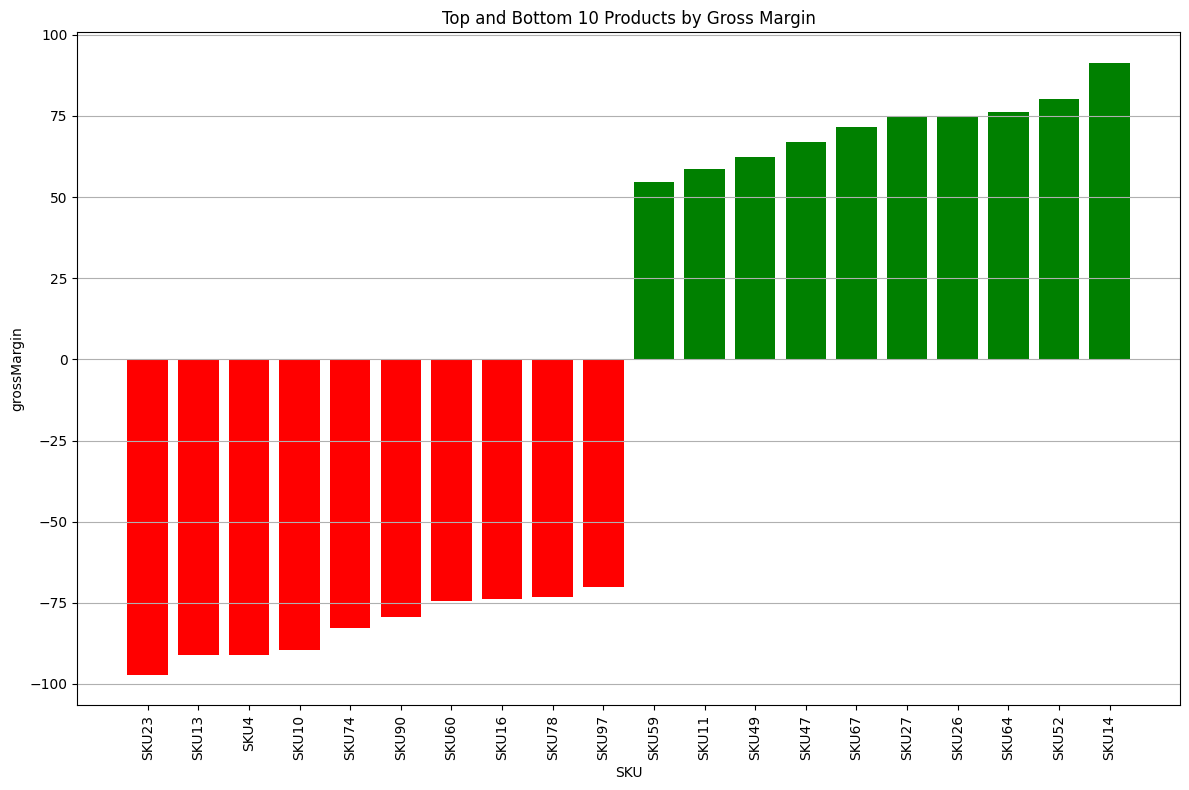

In [382]:
sortedData = data.sort_values('grossMargin', ascending=True)

topProduits = sortedData.head(10)
negProduits = sortedData.tail(10)

fusionProduits = pd.concat([topProduits, negProduits])

print("Raw Data for Top and Bottom 10 Products by Gross Margin:")
print(fusionProduits[['SKU', 'grossMargin']])

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in fusionProduits['grossMargin']]
plt.bar(fusionProduits['SKU'], fusionProduits['grossMargin'], color=colors)
plt.xlabel('SKU')
plt.ylabel('grossMargin')
plt.title('Top and Bottom 10 Products by Gross Margin')
plt.xticks(rotation=90)  
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

Top-selling products:
   Product type    SKU  Number of products sold
61     skincare  SKU10                      996
24    cosmetics  SKU94                      987
97     skincare   SKU9                      980
74     skincare  SKU37                      963
73     skincare  SKU36                      963
62     skincare  SKU11                      960
50     haircare  SKU78                      946
77     skincare  SKU40                      933
9     cosmetics  SKU44                      919
22    cosmetics  SKU91                      916
Underperforming products:
   Product type    SKU  Number of products sold
83     skincare  SKU56                       93
69     skincare   SKU3                       83
55     haircare  SKU87                       79
85     skincare   SKU6                       65
58     haircare  SKU97                       62
46     haircare  SKU70                       32
38     haircare  SKU48                       29
19    cosmetics  SKU85                  

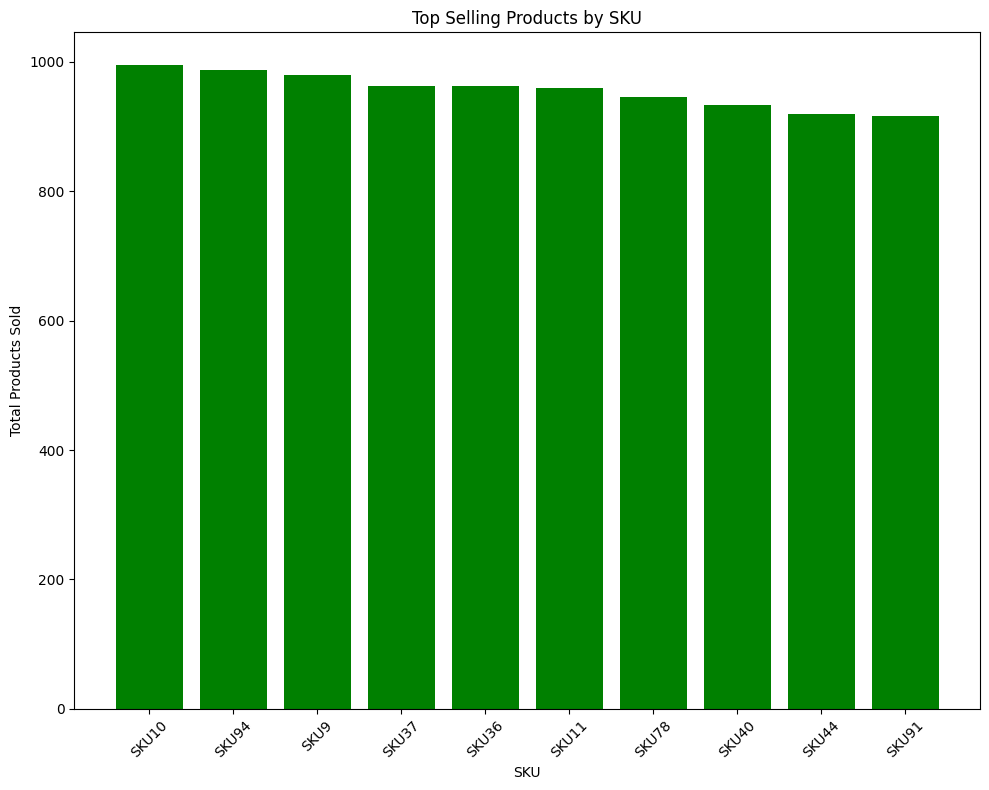

In [383]:
productPerformance = data.groupby(['Product type', 'SKU'])['Number of products sold'].sum().reset_index()

productPerformance = productPerformance.sort_values(by='Number of products sold', ascending=False)

print("Top-selling products:")
print(productPerformance.head(10))

print("Underperforming products:")
print(productPerformance.tail(10))

plt.figure(figsize=(10, 8))
top_products = productPerformance.head(10)
plt.bar(top_products['SKU'], top_products['Number of products sold'], color='green')
plt.xlabel('SKU')
plt.ylabel('Total Products Sold')
plt.title('Top Selling Products by SKU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Profitability and Cost Structure

#### Data Analysis Process
- **Gross Margin Calculation**: This crucial metric was calculated for each product to assess the impact of production and logistics costs against sales revenue, providing a clear view of profitability before considering overheads and other indirect expenses.
- **Revenue Per Product**: This analysis reflects the total income generated from each product, offering insights into individual sales performances and market acceptance.

#### Results and Observations

- **Profitability Analysis**:
  - **Low Performers**: The bottom 10 products displayed negative gross margins, signaling underperformance likely due to excessive costs or suboptimal pricing.
  - **High Performers**: In contrast, the top 10 products achieved healthy gross margins, indicative of strong market positioning and effective cost management.

#### Key Insights

- **Low Performers**: Products, such as SKU56, SKU3, and SKU87, are notably underperforming with significant negative gross margins, potentially due to high manufacturing and shipping costs or pricing strategies that fail to cover costs.
- **High Performers**: Products such as SKU10, SKU94, and SKU9 exhibit robust gross margins, reflecting a strong market position and effective cost controls.


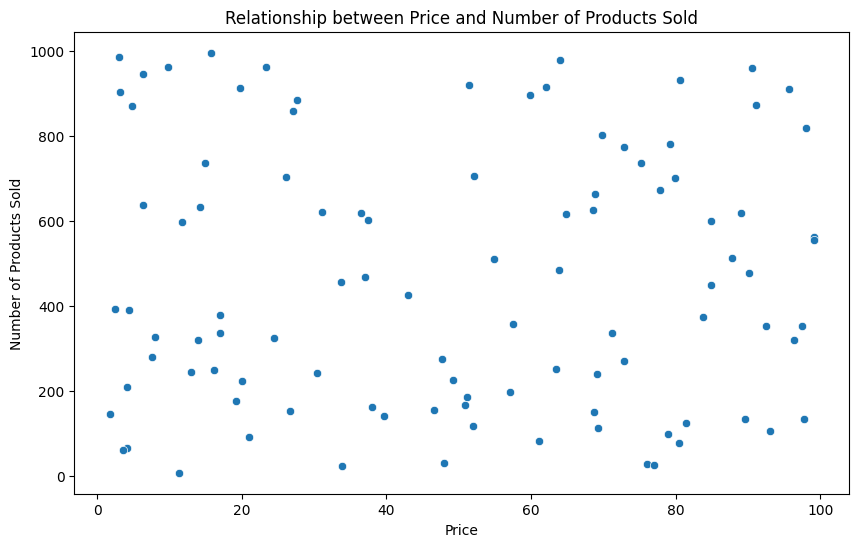

Correlation coefficient between price and number of products sold: 0.005739484396580528
                               OLS Regression Results                              
Dep. Variable:     Number of products sold   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.010
Method:                      Least Squares   F-statistic:                  0.003228
Date:                     Sat, 27 Apr 2024   Prob (F-statistic):              0.955
Time:                             18:23:03   Log-Likelihood:                -713.02
No. Observations:                      100   AIC:                             1430.
Df Residuals:                           98   BIC:                             1435.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [384]:
from scipy.stats import pearsonr
import statsmodels.api as sm


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Number of products sold', data=data)
plt.title('Relationship between Price and Number of Products Sold')
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.show()

correlation, _ = pearsonr(data['Price'], data['Number of products sold'])
print(f'Correlation coefficient between price and number of products sold: {correlation}')


X = sm.add_constant(data['Price'])  # adding a constant for the intercept
model = sm.OLS(data['Number of products sold'], X)
results = model.fit()
print(results.summary())


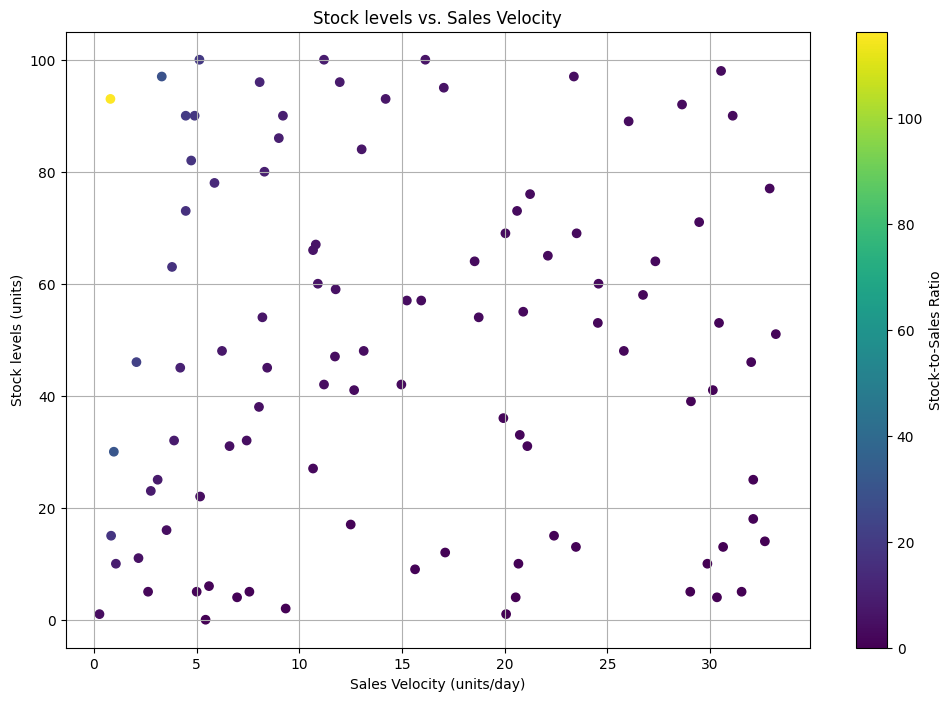

Overstocked Items:
      SKU  Stock levels  Sales Velocity  Stock-to-Sales Ratio
2    SKU2             1        0.266667              3.750000
3    SKU3            23        2.766667              8.313253
5    SKU5            90        4.900000             18.367347
6    SKU6            11        2.166667              5.076923
7    SKU7            93       14.200000              6.549296
12  SKU12           100       11.200000              8.928571
13  SKU13            80        8.300000              9.638554
17  SKU17            45        4.200000             10.714286
19  SKU19            48        6.233333              7.700535
21  SKU21            69       20.033333              3.444260
23  SKU23            84       13.033333              6.445013
25  SKU25            82        4.733333             17.323944
26  SKU26            59       11.766667              5.014164
27  SKU27            47       11.733333              4.005682
28  SKU28            48       13.133333            

In [385]:
data['Sales Velocity'] = data['Number of products sold'] / 30  

# Analyzing stock levels against sales velocity

data['Stock-to-Sales Ratio'] = data['Stock levels'] / data['Sales Velocity']

plt.figure(figsize=(12, 8))
plt.scatter(data['Sales Velocity'], data['Stock levels'], c=data['Stock-to-Sales Ratio'], cmap='viridis')
plt.colorbar(label='Stock-to-Sales Ratio')
plt.xlabel('Sales Velocity (units/day)')
plt.ylabel('Stock levels (units)')
plt.title('Stock levels vs. Sales Velocity')
plt.grid(True)
plt.show()

overstocked = data[data['Stock-to-Sales Ratio'] > 3]  
understocked = data[data['Stock-to-Sales Ratio'] < 1]  

print("Overstocked Items:")
print(overstocked[['SKU', 'Stock levels', 'Sales Velocity', 'Stock-to-Sales Ratio']])

print("Understocked Items:")
print(understocked[['SKU', 'Stock levels', 'Sales Velocity', 'Stock-to-Sales Ratio']])


### Overstocked and Understocked Items

#### Data Overview
- **Stock Levels**: Current inventory.
- **Sales Velocity**: Average number of units sold per time unit.
- **Stock-to-Sales Ratio**: Ratio of stock levels to sales velocity, indicating how many times the current stock covers the sales velocity.

#### Detailed Analysis

1. **Overstocked Items**:

   - Products with a high stock-to-sales ratio, indicating inventory levels that may exceed demand.

   - **Key Examples**:
     - **SKU45** with a stock-to-sales ratio of **116.25**, indicating excessive stock relative to its current sales pace.
     - **SKU48** and **SKU49** with ratios of **31.03** and **29.39** respectively, showing significantly high inventory levels that are not aligned with their sales rates.

2. **Understocked Items**:

   - Products with a low stock-to-sales ratio, indicating potential risk of stockouts.

   - **Key Examples**:
     - **SKU34** and **SKU78** with ratios of **0.05** and **0.16** respectively, showing critical low levels of inventory compared to their sales velocities, signaling an urgent need for restocking.
     - **SKU4** and **SKU9**, despite having higher absolute sales velocities, maintain very low ratios of **0.17** and **0.43**, suggesting rapid turnover and potential understocking.



Lead times Statistics by Supplier:
  Supplier name       mean  median       std  max  min
0    Supplier 1  16.777778    16.0  8.590394   29    1
1    Supplier 2  16.227273    18.0  8.809799   29    1
2    Supplier 3  14.333333    14.0  8.764104   30    2
3    Supplier 4  17.000000    18.0  8.898116   30    1
4    Supplier 5  14.722222    15.0  9.596602   29    1


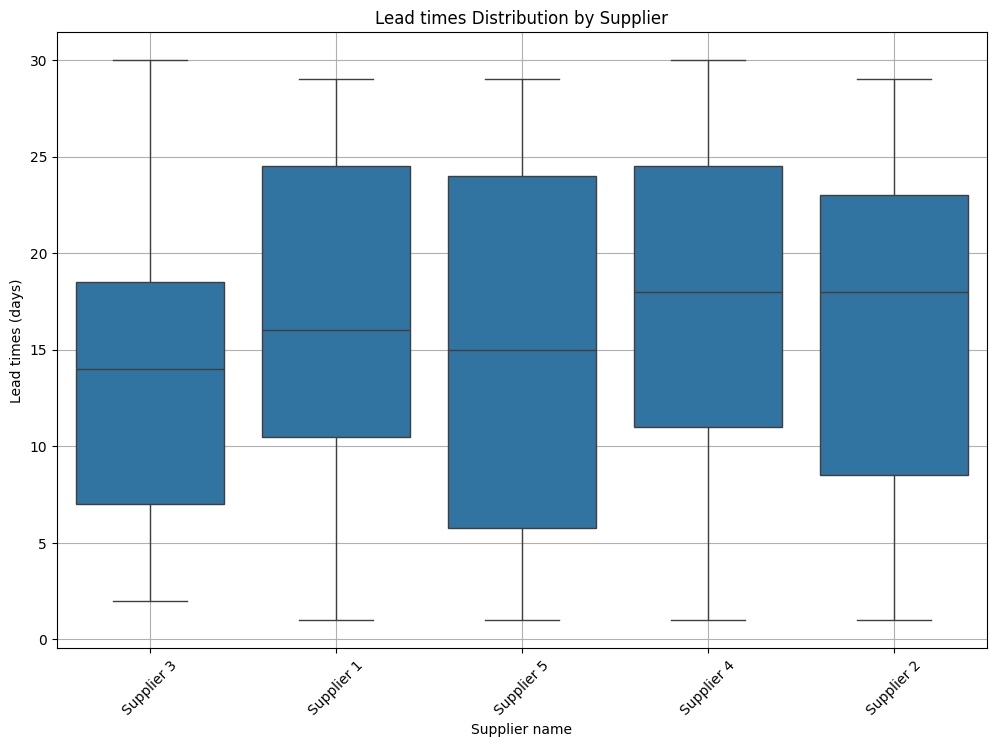

Potential Bottleneck Suppliers:
  Supplier name  mean  median       std  max  min
3    Supplier 4  17.0    18.0  8.898116   30    1


In [386]:
data['Supplier name'] = data['Supplier name'].astype(str)

supplier_stats = data.groupby('Supplier name')['Lead times'].agg(['mean', 'median', 'std', 'max', 'min']).reset_index()
print("Lead times Statistics by Supplier:")
print(supplier_stats)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Supplier name', y='Lead times', data=data)
plt.title('Lead times Distribution by Supplier')
plt.xlabel('Supplier name')
plt.ylabel('Lead times (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


bottlenecks = supplier_stats[supplier_stats['mean'] > supplier_stats['mean'].quantile(0.75)]
print("Potential Bottleneck Suppliers:")
print(bottlenecks)


## Analysis of Lead Times by Supplier

### Detailed Analysis

#### Statistical Measures of Lead Times
- **Mean Lead Time**: Average time taken by suppliers to deliver goods.
- **Median Lead Time**: Middle value of lead times, providing a robust measure against outliers.
- **Standard Deviation**: Measures the variability or spread in lead times.
- **Max and Min Lead Times**: Indicate the range of lead times, offering insights into best and worst-case scenarios.

#### Supplier Performance
- **Supplier 1**:
  - **Mean**: 16.78 days
  - **Median**: 16 days
  - **Standard Deviation**: 8.59 days
  - Indicates moderately consistent lead times with a balance between mean and median values.

- **Supplier 2**:
  - **Mean**: 16.23 days
  - **Median**: 18 days
  - **Standard Deviation**: 8.81 days
  - Slightly higher variability and a higher median suggest a less stable supply chain.




Descriptive Statistics for Manufacturing Metrics:
       Manufacturing costs  Lead times  Production volumes
count           100.000000  100.000000          100.000000
mean             47.266693   15.960000          567.840000
std              28.982841    8.785801          263.046861
min               1.085069    1.000000          104.000000
25%              22.983299    8.000000          352.000000
50%              45.905622   17.000000          568.500000
75%              68.621026   24.000000          797.000000
max              99.466109   30.000000          985.000000


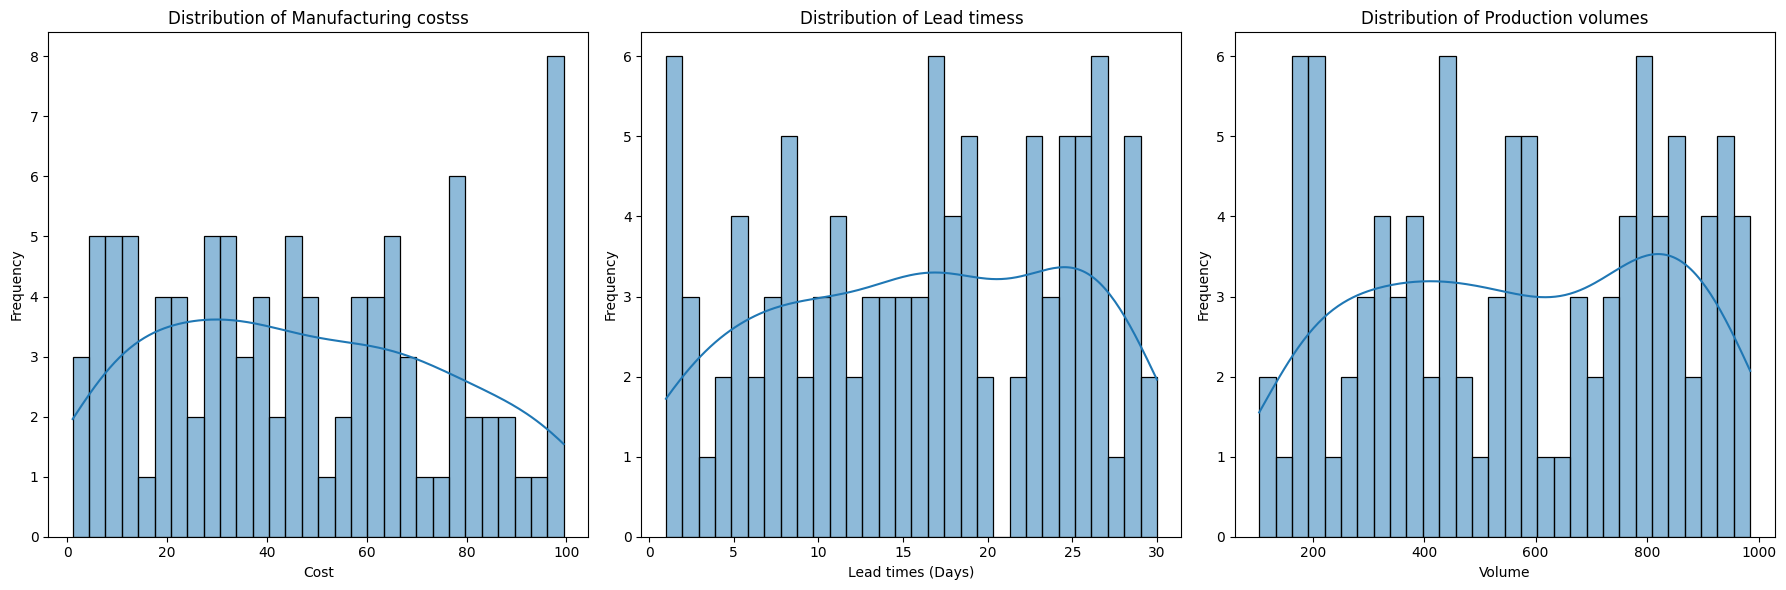

<Figure size 1000x800 with 0 Axes>

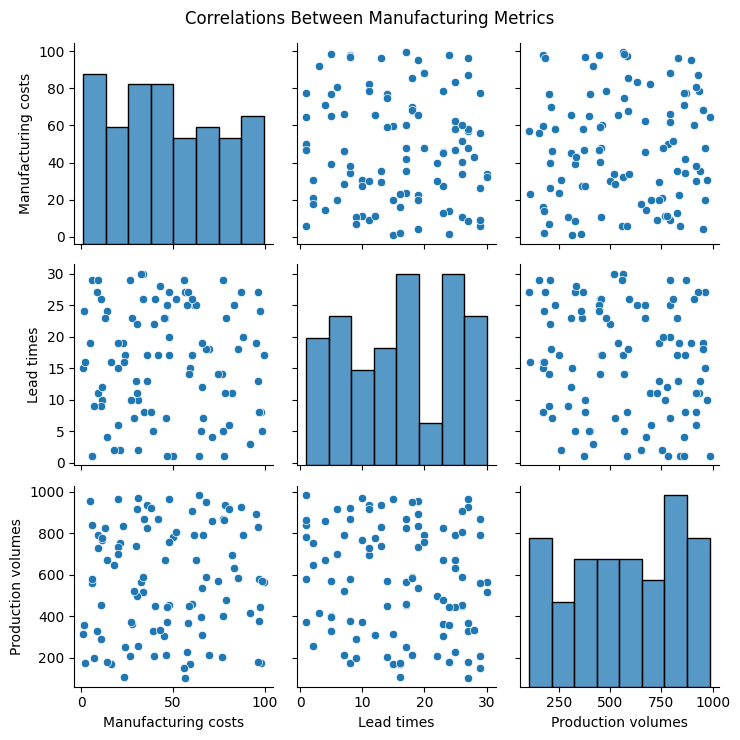

In [387]:
print("Descriptive Statistics for Manufacturing Metrics:")
print(data[['Manufacturing costs', 'Lead times', 'Production volumes']].describe())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.histplot(data['Manufacturing costs'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Manufacturing costss')
axes[0].set_xlabel('Cost')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Lead times'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Lead timess')
axes[1].set_xlabel('Lead times (Days)')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Production volumes'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Production volumes')
axes[2].set_xlabel('Volume')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(data[['Manufacturing costs', 'Lead times', 'Production volumes']])
plt.suptitle('Correlations Between Manufacturing Metrics', verticalalignment='top')
plt.tight_layout()
plt.show()


### Statistics for Manufacturing Metrics

#### Data Overview

- **Manufacturing Costs**
- **Lead Times**
- **Production Volumes**

#### Detailed Analysis

1. **Manufacturing Costs**:
   - **Count**: 100 products.
   - **Mean**: Average manufacturing cost is $47.27.
   - **Standard Deviation**: Costs vary with a standard deviation of $28.98, indicating a wide range of manufacturing expenses across products.
   - **Min/Max**: Costs range from a low of $1.09 to a high of $99.47.
   - **Quartiles**:
     - **25%**: The lower quartile is $22.98, indicating that 25% of the products cost less than this to manufacture.
     - **50% (Median)**: Median cost is $45.91, representing the middle cost point.
     - **75%**: The upper quartile is $68.62, indicating that 75% of the products cost less than this.

2. **Lead Times**:
   - **Count**: Data for 100 products.
   - **Mean**: Average lead time is approximately 16 days.
   - **Standard Deviation**: The variation in lead times is 8.79 days.
   - **Min/Max**: Lead times range from 1 day to 30 days.
   - **Quartiles**:
     - **25%**: The first quartile is 8 days.
     - **50% (Median)**: Median lead time is 17 days.
     - **75%**: The third quartile is 24 days, indicating longer preparation or production times for 25% of the items.

3. **Production Volumes**:
   - **Count**: Data for 100 products.
   - **Mean**: Average production volume is 568 units.
   - **Standard Deviation**: The standard deviation is 263 units, suggesting significant variability in production scales.
   - **Min/Max**: Production ranges from 104 units to 985 units.
   - **Quartiles**:
     - **25%**: The lower quartile is 352 units.
     - **50% (Median)**: The median production volume is 568.5 units.
     - **75%**: The upper quartile is 797 units, showing a higher production capacity for the top 25% of the products.

Shipping Metrics by Carrier:
  Shipping carriers Shipping times                  Shipping costs            \
                              mean median       std           mean    median   
0         Carrier A       6.142857    7.0  3.170632       5.554923  5.126010   
1         Carrier B       5.302326    5.0  2.493180       5.509247  5.773264   
2         Carrier C       6.034483    7.0  2.584055       5.599292  5.352878   

             
        std  
0  2.629884  
1  2.861520  
2  2.428689  


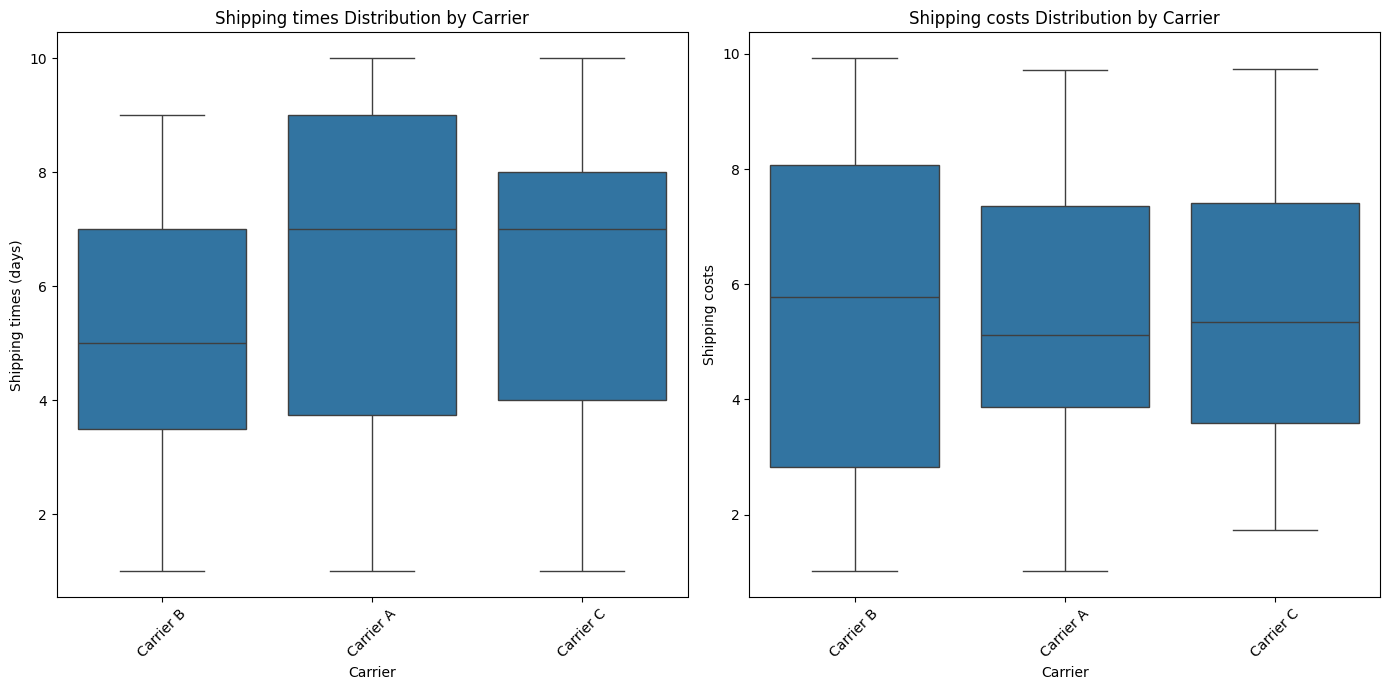

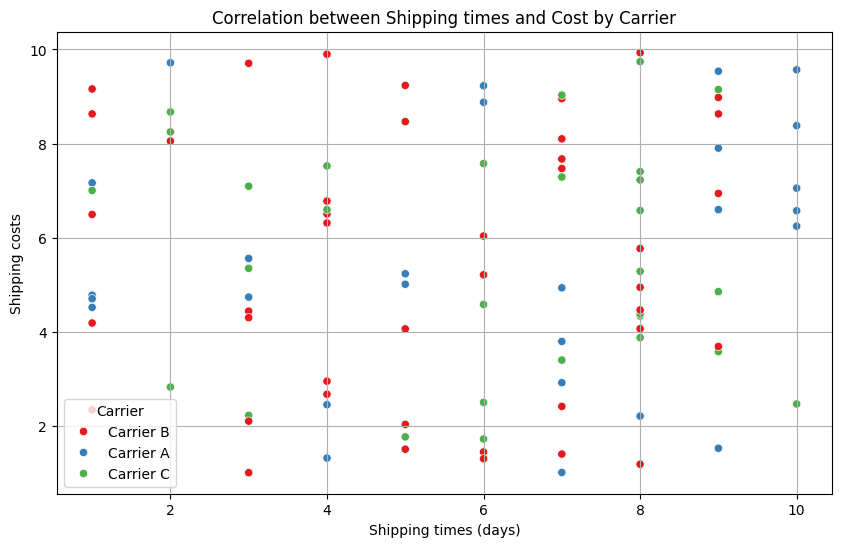

In [388]:
carrier_stats = data.groupby('Shipping carriers').agg({
    'Shipping times': ['mean', 'median', 'std'],
    'Shipping costs': ['mean', 'median', 'std']
}).reset_index()
print("Shipping Metrics by Carrier:")
print(carrier_stats)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Shipping carriers', y='Shipping times', data=data)
plt.title('Shipping times Distribution by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Shipping times (days)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Shipping carriers', y='Shipping costs', data=data)
plt.title('Shipping costs Distribution by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Shipping costs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping times', y='Shipping costs', hue='Shipping carriers', data=data, palette='Set1')
plt.title('Correlation between Shipping times and Cost by Carrier')
plt.xlabel('Shipping times (days)')
plt.ylabel('Shipping costs')
plt.grid(True)
plt.legend(title='Carrier')
plt.show()


### Shipping Metrics Analysis by Carrier

2. **Shipping Times**:
   - **Carrier A**:
     - **Mean**: 6.14 days
     - **Median**: 7.0 days
     - **Standard Deviation**: 3.17 days
     - Indicates variability in delivery times with some shipments taking longer than a week.
   - **Carrier B**:
     - **Mean**: 5.30 days
     - **Median**: 5.0 days
     - **Standard Deviation**: 2.49 days
     - Shows more consistent and faster delivery compared to others.
   - **Carrier C**:
     - **Mean**: 6.03 days
     - **Median**: 7.0 days
     - **Standard Deviation**: 2.58 days
     - Similar to Carrier A but slightly more consistent in delivery times.

3. **Shipping Costs**:
   - **Carrier A**:
     - **Mean**: $5.55
     - **Median**: $5.13
     - **Standard Deviation**: $2.63
     - Reflects moderate variability in cost which might be linked to distance or shipment size.
   - **Carrier B**:
     - **Mean**: $5.51
     - **Median**: $5.77
     - **Standard Deviation**: $2.86
     - Slightly higher median costs suggest a premium for faster service.
   - **Carrier C**:
     - **Mean**: $5.60
     - **Median**: $5.35
     - **Standard Deviation**: $2.43
     - Costs are competitive, with less variation than Carrier B.


Routes and Mode Metrics:
     Routes Transportation modes Shipping times                           \
                                           mean median       std min max   
0   Route A                  Air       5.272727    7.0  3.319365   1   9   
1   Route A                 Rail       6.357143    6.0  2.205139   1  10   
2   Route A                 Road       5.363636    5.0  2.618119   1   9   
3   Route A                  Sea       7.571429    8.0  1.718249   4   9   
4   Route B                  Air       5.285714    5.0  2.360387   3  10   
5   Route B                 Rail       6.636364    7.0  2.730301   1  10   
6   Route B                 Road       4.769231    4.0  2.488435   2   9   
7   Route B                  Sea       6.500000    7.0  2.738613   2  10   
8   Route C                  Air       4.750000    4.5  3.535534   1  10   
9   Route C                 Rail       7.333333    8.0  3.055050   4  10   
10  Route C                 Road       3.200000    3.0  2.48998

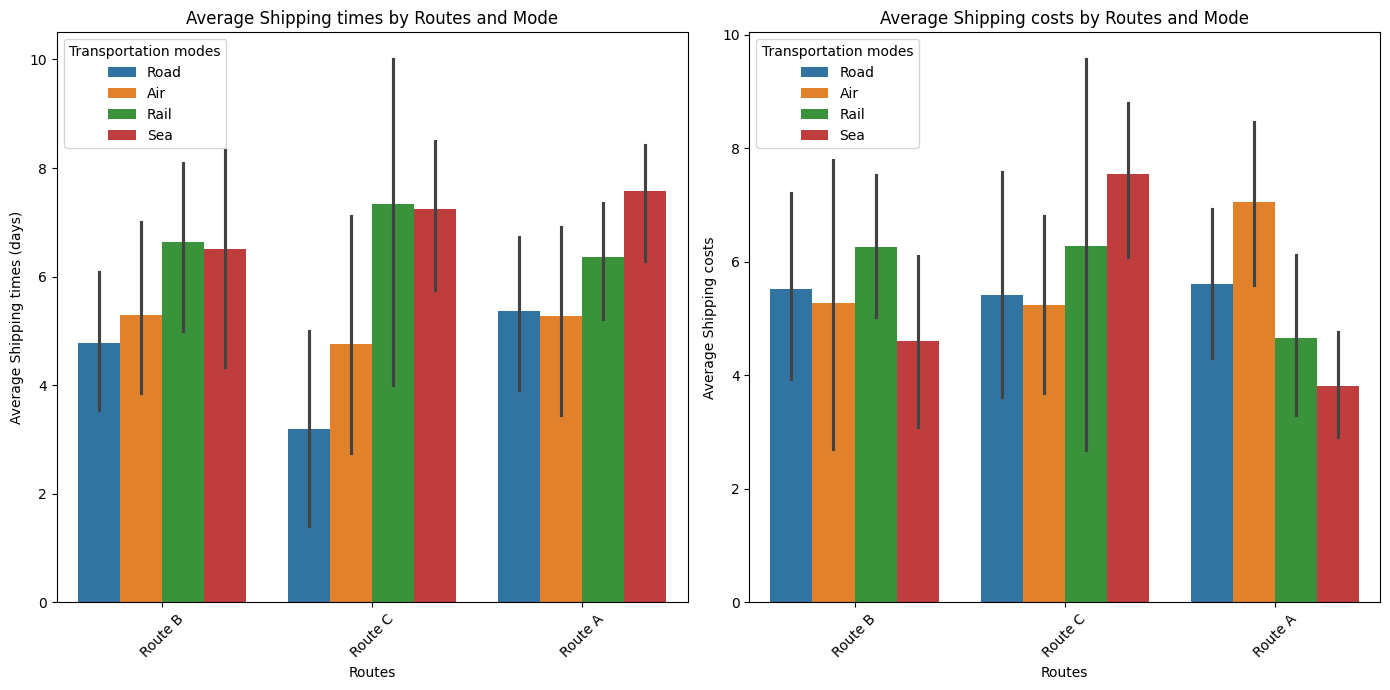

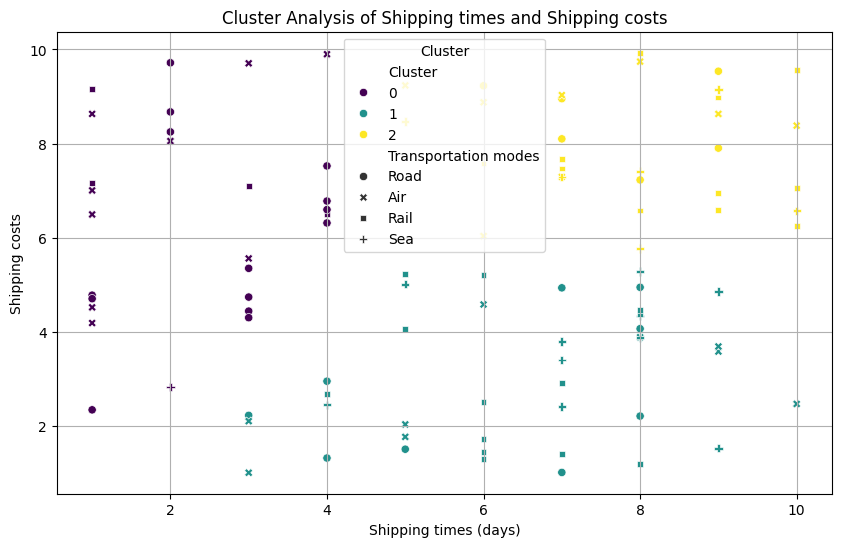

In [389]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Routes_stats = data.groupby(['Routes', 'Transportation modes']).agg({
    'Shipping times': ['mean', 'median', 'std', 'min', 'max'],
    'Shipping costs': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()
print("Routes and Mode Metrics:")
print(Routes_stats)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Routes', y='Shipping times', hue='Transportation modes', data=data)
plt.title('Average Shipping times by Routes and Mode')
plt.xlabel('Routes')
plt.ylabel('Average Shipping times (days)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Routes', y='Shipping costs', hue='Transportation modes', data=data)
plt.title('Average Shipping costs by Routes and Mode')
plt.xlabel('Routes')
plt.ylabel('Average Shipping costs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


cluster_data = data[['Shipping times', 'Shipping costs']]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_scaled)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping times', y='Shipping costs', hue='Cluster', data=data, palette='viridis', style='Transportation modes')
plt.title('Cluster Analysis of Shipping times and Shipping costs')
plt.xlabel('Shipping times (days)')
plt.ylabel('Shipping costs')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Shipping Routes and Modes

##### Shipping Times
1. **Route A**:
   - **Air**: Average time is 5.27 days, showing high variability with a maximum of 9 days.
   - **Rail**: Slightly longer times with an average of 6.36 days.
   - **Road**: Comparable to air with a mean of 5.36 days, with less variability.
   - **Sea**: The slowest mode on this route with an average of 7.57 days.

2. **Route B**:
   - **Air**: Consistently quick with an average of 5.29 days.
   - **Rail**: Longer average times at 6.64 days.
   - **Road**: The fastest on this route with a mean of 4.77 days.
   - **Sea**: Mid-range times with an average of 6.50 days.

3. **Route C**:
   - **Air**: Fastest across all routes and modes with an average of 4.75 days.
   - **Rail**: Considerably slower, averaging 7.33 days.
   - **Road**: Extremely efficient with the lowest average time of 3.20 days.
   - **Sea**: Comparatively slow with an average of 7.25 days.

##### Shipping Costs
1. **Route A**:
   - **Air**: Higher costs, averaging $7.06.
   - **Rail**: More economical at $4.67.
   - **Road**: Moderate cost with an average of $5.61.
   - **Sea**: Most cost-effective on this route at $3.81.

2. **Route B**:
   - **Air**: Costs average around $5.27.
   - **Rail**: Slightly higher at $6.27.
   - **Road**: Balanced cost at $5.53.
   - **Sea**: Lower costs with an average of $4.61.

3. **Route C**:
   - **Air**: Averages at $5.25.
   - **Rail**: Higher costs at $6.28.
   - **Road**: Cost-efficient at $5.41.
   - **Sea**: The most expensive mode on Route C at $7.55.
